<a href="https://colab.research.google.com/github/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System/blob/main/Webmd_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WebMD.com Data Exploration

Description - 

Attribute Information:

1. Age
2. Condition
3. Date
4. Drug
5. DrugId
6. Easeofuse
7. Effectiveness
8. Review
9. Sex
10. Sides
11. UsefulCount

In [19]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
from wordcloud import WordCloud
import altair as alt


In [20]:
#Cloning Git repository
!git clone https://github.com/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System.git

fatal: destination path 'Medicines-and-Common-Treatment-Recommendation-System' already exists and is not an empty directory.


In [3]:
!ls Medicines-and-Common-Treatment-Recommendation-System/Drugscom

 drugsComTest_raw.csv   drugsComTrain_raw.tsv
 drugsComTest_raw.tsv  'drugscom train treatments.xlsx'


## Data Loading

In [4]:
# Importing dataset from drive
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/Webmd')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
#Loading webmd data
webmd_df=pd.read_csv('/content/gdrive/My Drive/Webmd/webmd.csv')

In [6]:
webmd_df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [7]:
#Dataset shape
print("Webmd Data shape :" ,webmd_df.shape)


Webmd Data shape : (362806, 12)


In [8]:
#Data Information
webmd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


##Data Cleaning

In [9]:
#Checking for null values
webmd_df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

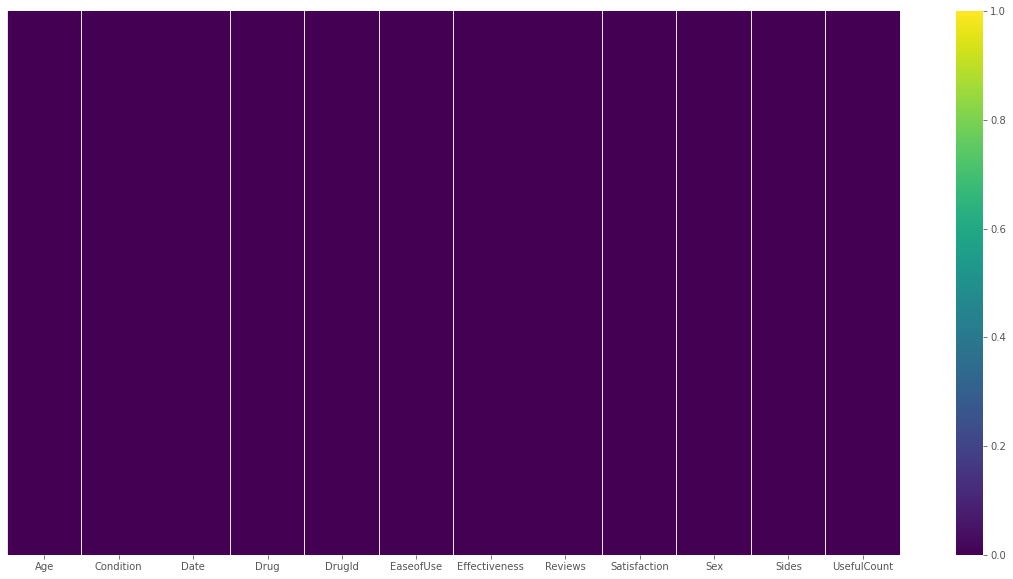

In [10]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(webmd_df.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

In [11]:
def missing_values(df):
    """Returns a summary of missing values in df"""
    nrows = df.shape[0]
    data = []
    
    def pct(n, total):
        return round(n/total, 2)
    
    for col in df.columns:

        # string (Object) type columns
        if df[col].dtype.kind == "O":
            df[col] = df[col].str.strip()
            nulls = df[df[col] == ""][col].count()
            nulls += df[col].isnull().sum()

        # numerical (int) type columns
        elif df[col].dtype.kind == "i":
            nulls = df[col].isnull().sum()

        pctofnulls = pct(nulls, nrows)
        data.extend(
            [{"column": col, "pct": 1-pctofnulls, "num of records": nrows-nulls, "type": "not missing"},
             {"column": col, "pct": pctofnulls, "num of records": nulls, "type": "missing"}])
    
    return pd.DataFrame(data)

In [12]:
missing = missing_values(webmd_df)

In [13]:
missing

,column,pct,num of records,type
0,Age,0.97,350604,not missing
1,Age,0.03,12202,missing
2,Condition,1.00,362763,not missing
3,Condition,0.00,43,missing
4,Date,1.00,362806,not missing
5,Date,0.00,0,missing
6,Drug,1.00,362806,not missing
7,Drug,0.00,0,missing
8,DrugId,1.00,362806,not missing
9,DrugId,0.00,0,missing


In [14]:
bars = (alt.Chart()
           .mark_bar(size=25, 
                     strokeWidth=1,
                     stroke="white",
                     strokeOpacity=0.7,
                     )
           .encode(x=alt.X("sum(num of records)",
                           axis=alt.Axis(title="number of records",
                                         grid=True)), 
                   y=alt.Y("column:O",
                           axis=alt.Axis(title="columns")),
                   tooltip=("column", "type", "num of records:Q",
                            alt.Tooltip("pct:Q", format=".1%")),
                   color=alt.Color("type",
                                   scale=alt.Scale(range=["#11043a", "#648bce"])))
           .properties(title="Missing Values"))

text = (alt.Chart()
           .mark_text(align="right",
                      dx=-1)
           .encode(x=alt.X("sum(num of records)", 
                           stack="zero"),
                   y=alt.Y("column"),
                   color=alt.Color("type",
                                   legend=None,
                                   scale=alt.Scale(range=["white"])),
                   text=alt.Text("pct", format=".0%")))

(alt.layer(bars, text, data=missing)
    .configure(background='#11043a')
    .configure_title(font="Arial",
                     fontSize=18,
                     color="#e6f3ff",
                     dy=-10)
    .configure_text(color="white")
    .configure_legend(titleFontSize=12,
                      titleColor="white",
                      tickCount=10,
                      titleOpacity=0.8,
                      labelColor="white",
                      labelOpacity=0.7,
                      titlePadding=10)
    .configure_axis(titleFontSize=13,
                    titlePadding=20,
                    titleColor="white",
                    titleOpacity=0.8,
                    labelFontSize=11,
                    labelColor="white",
                    labelOpacity=0.7,
                    tickOffset=0,
                    grid=False,
                    gridOpacity=0.15)
    .configure_view(strokeWidth=0)
    .resolve_scale(color='independent')
    .properties(height=300, width=680))

#https://www.kaggle.com/sszokoly/webmd-part1

alt.LayerChart(...)

## Checking count of Unique values of each features

In [15]:
[[col, webmd_df[col].nunique()] for col in webmd_df.columns.difference(["Reviews"])]


[['Age', 12],
 ['Condition', 1806],
 ['Date', 4524],
 ['Drug', 7093],
 ['DrugId', 6572],
 ['EaseofUse', 7],
 ['Effectiveness', 7],
 ['Satisfaction', 7],
 ['Sex', 3],
 ['Sides', 1650],
 ['UsefulCount', 148]]

In [16]:
unique_values = [[c, webmd_df[c].nunique()] for c in webmd_df.columns.difference(["Reviews"])]
df_unique = pd.DataFrame(data=unique_values, columns=["columns", "count of unique values"])
df_unique

,columns,count of unique values
0,Age,12
1,Condition,1806
2,Date,4524
3,Drug,7093
4,DrugId,6572
5,EaseofUse,7
6,Effectiveness,7
7,Satisfaction,7
8,Sex,3
9,Sides,1650


In [17]:
import plotly.graph_objects as go
fig= go.Figure(data=[go.Bar(x=list(df_unique.columns), y=list(df_unique['count of unique values']),name='Primary Product',marker_color='indianred')])
fig.show()



In [18]:
fig = px.bar(df_unique, y='columns', x='count of unique values', text='columns')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

ValueError: ignored

## Top 5 drugs satisfaction level


In [ ]:
# distribution of satisfaction vs. drugs, only 5 most reviewed drugs presented
plt.style.use('seaborn-deep')

y1 = webmd_df[webmd_df.Drug=='drugA']['Satisfaction']
y2 = webmd_df[webmd_df.Drug=='drugB']['Satisfaction']
y3 = webmd_df[webmd_df.Drug=='drugC']['Satisfaction']
y4 = webmd_df[webmd_df.Drug=='drugD']['Satisfaction']
y5 = webmd_df[webmd_df.Drug=='drugE']['Satisfaction']

bins = np.linspace(0,6,12)

plt.hist([y1, y2, y3, y4, y5], bins,\
        label=['drugA', 'drugB', 'drugC',\
               'drugD', 'drugE'], normed=True)

plt.legend(loc='upper right')

plt.xlabel('satisfaction per drug', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('distribution(histogram normalized)', fontsize=15)
plt.title('satisfaction distribution of top 5 drugs', fontsize=15) 

plt.show()

## # drug vs. % of reviewers with a specific side effect